In [120]:
# You may add additional imports here
import random 
import csv
import matplotlib.pyplot as plt

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [121]:
def game(ra, rb):
    # Probability A wins
    PA = ra/(ra + rb)
    a_score = 0
    b_score = 0

    while not ((a_score >= 11 and (b_score <= a_score - 2 )) or (b_score >= 11 and (a_score <= b_score - 2))):
        r = random.random()
        if (r < PA): 
            # A scores
            a_score += 1
        else: 
            # B scores
            b_score += 1

    return [a_score, b_score]

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [122]:
random.seed(57)
print(game(70, 30))

[11, 5]


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [123]:
# This may not be the best solution, but I wanted to allow this function to be used for both the pars and english games
# without re-writing code.
def win_probability_game(ra, rb, simulations, game_func = game, extra = None):
    a_wins = 0
    b_wins = 0
    param = None

    if (extra == None):
        params = (ra, rb)
    else:
        params = (ra, rb, extra)

    for i in range(simulations):
        result = game_func(*params)
        if (result[0] > result[1]):
            a_wins += 1
        else:
            b_wins += 1

    return a_wins / (a_wins + b_wins)
    

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [124]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30, 10000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [125]:
def read_abilities(file_name): # HINT: what should the argument be?
    pairs = []
    with open(file_name) as csvfile:
        reader = csv.reader(csvfile)

        # Skip the first line (the header)
        rows = iter(reader)
        next(rows)

        for row in rows:
            pairs.append((int(row[0]), int(row[1])))

    return pairs

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [126]:
# Print the result of calling the function for the file `test.csv`
read_abilities("test.csv")

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [127]:
def plot_win_probabilities(skill_levels, simulations): # HINT: what should the argument be?
    a_b_ratio = []
    a_probability = []

    for i in skill_levels:
        a_b_ratio.append(i[0] / i[1])
        a_probability.append((win_probability_game(i[0], i[1], simulations)))

    plt.xlabel("ra / rb")
    plt.ylabel("Probability a wins")
    plt.plot(a_b_ratio, a_probability, 'ro')

    return a_probability

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


[0.995, 0.916, 0.7, 0.003, 0.6]

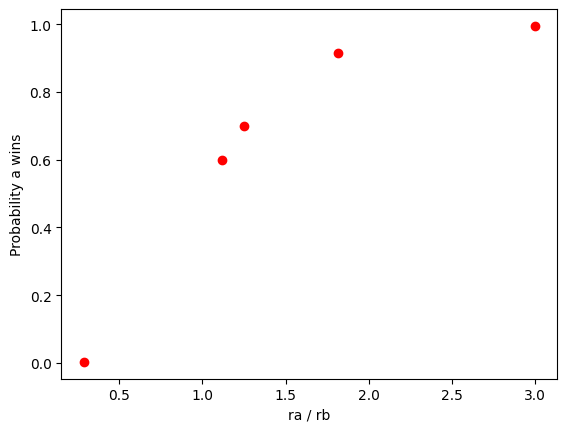

In [128]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities("test.csv"), 1000)

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [129]:
def play_pars_match(ra, rb, m):
    # How many games either a or b have won
    a_game_wins = 0
    b_game_wins = 0
     
    while (a_game_wins < m ) and (b_game_wins < m):
        score = game(ra, rb)
        if (score[0] > score[1]):
            a_game_wins += 1
        else:
            b_game_wins += 1

    return [a_game_wins, b_game_wins] 

def win_probability_match(ra, rb, simulations, m):
    # How many times a or b won a match
    a_match_wins = 0
    b_match_wins = 0

    for i in range(simulations):
        game_wins = play_pars_match(ra, rb, m)
        
        if (game_wins[0] > game_wins[1]):
            a_match_wins += 1
        else:
            b_match_wins += 1

    return a_match_wins / (a_match_wins + b_match_wins)
    
def calc_lowest_m(ra, rb, simulations):
    prob = 0
    m = 0

    while (prob < 0.9):
        m += 1
        prob = win_probability_match(ra, rb, simulations, m)

    return m

# Calculate lowest value of m here
calc_lowest_m(60, 40, 10000)

2

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

In [130]:
# English Scoring Code

def create_data_set(amount = 100):
    data = []
    for i in range(amount):
        data.append((i + 1,50))

    return data

def check_score_is_eight(score, player):
    if (score == 8):
        return player
    else:
        return None

def get_new_win_score(server, player_to_eight_first, pa):
    r = random.random()

    if (r < 0.5):
        return 10
    else:
        return 9


def english_game(ra, rb, server = "a"):
    pa = ra / (ra + rb)

    win_score = 9
    a_score = 0
    b_score = 0
    # Stores the most recent player to get to a score of eight
    got_to_eight = None

    while (a_score < win_score) and (b_score < win_score):
        win_chance = random.random()

        if (server == "a"):
            if (win_chance < pa):
                a_score += 1
                got_to_eight = check_score_is_eight(a_score, "a")
            else:
                server = "b"
        else:
            if (win_chance < 1 - pa):
                b_score += 1
                got_to_eight = check_score_is_eight(b_score, "b")
            else:
                server = "a"

        if (a_score == 8 and b_score == 8):
            # As got_to_eight stores the most recent player
            # the other player must be the one who got to eight first
            if (got_to_eight == "b"):
                got_to_eight = "a"
            else:
                got_to_eight = "b"

            # Decide whether to play to 9 or 10
            win_score = 10 
            #win_score = get_new_win_score(server, got_to_eight, pa)

    return [a_score, b_score]



In [137]:
# Graph code

# ---------------------------------------------------------------- Graph 1
def plot_single_win_probability(ra, rb, simulations):

    a_probability_english = []
    b_probability_english = []
    a_probability_pars = []
    test = []

    for i in range(simulations):
        a_probability_pars.append((win_probability_game(ra, rb, simulations, game)))

    for i in range(simulations):
        a_probability_english.append((win_probability_game(ra, rb, simulations, english_game)))

    for i in range(simulations):
        b_probability_english.append((win_probability_game(ra, rb, simulations, english_game, "b")))
    
    for i in range(simulations):
        r = random.random()
        if (r < 0.5):
            t = "a"
        else:
            t = "b"
        test.append((win_probability_game(ra, rb, simulations, english_game, t)))
        

    data = [a_probability_pars, a_probability_english, b_probability_english, test]

    plt.ylabel("Probability a wins")
    plt.boxplot(data)
    plt.xticks([1, 2, 3, 4], ['PARS', 'English\n(a serves)', 'English\n(b serves)', 'English\n(Random server)'])
    plt.title("Equal skill levels")
    
    return

# ---------------------------------------------------------------- Graph 2
def plot_win_probabilities_both(skill_levels, simulations): # HINT: what should the argument be?
    a_b_ratio = []
    a_probability = []

    a_b_ratio_english = []
    a_probability_english = []
    b_probability_english_b_serves= []

    test = []

    for i in range(len(skill_levels)):
        p = skill_levels[i]
        a_b_ratio.append(p[0] / p[1])
        a_probability.append((win_probability_game(p[0], p[1], simulations, game)))
    
    for i in range(len(skill_levels)):
        p = skill_levels[i]
        a_b_ratio_english.append(p[0] / p[1])
        a_probability_english.append((win_probability_game(p[0], p[1], simulations, english_game)))

    for i in range(len(skill_levels)):
        p = skill_levels[i]
        b_probability_english_b_serves.append((win_probability_game(p[0], p[1], simulations, english_game, "b")))

    #for i in range(simulations):
    #    r = random.random()
    #    if (r < 0.5):
    #        t = "a"
    #    else:
    #        t = "b"
    #    test.append((win_probability_english_game(p[0], p[1], simulations, t)))
    
    plt.xlabel("ra / rb")
    plt.ylabel("Probability a wins")
    plt.plot(a_b_ratio, a_probability, color="red", label='PARS')
    plt.plot(a_b_ratio_english, a_probability_english, color="blue", label='English (a serves)')
    plt.plot(a_b_ratio_english, b_probability_english_b_serves, color="green", label='English (b serves)')
    #plt.plot(a_b_ratio_english, test, color="oranage", label='random')
    plt.title("Probability A wins a given game")
    plt.subplots_adjust(bottom=0.1)
    plt.legend()

    return a_probability



## Problem

I am investigating which squash scoring system, Point-a-rally or English scoring, is better. To determine the better system, I will take factors such as player advantage and skill into account.
Personally, I am expecting the initial server in an English game to have a higher chance of winning a game for a particular value of ra/rb verses PARS. This is because the opponent must win 2 rallies in a row to get one point unlike PARS. Using pars, in my simulation, the server should have no increased odds of winning.

## Method

Each player has a skill level (1 - 100) which can be used to calculate the chance of them winning a point. 
To show how these systems, differ, I will perform 2 main simulations. Firstly, a simulation which takes a large range of ra/rb (100 values) and compares the probability that player A wins for each value. Rb shall remain constant (at 50) and ra shall range from 1 to 100. The probability will be calculated by running many games for each ra/rb value and getting the average chance of victory for a. Then, the probability will be plotted against ra/rb on a graph for both PARS and English games. 
To implement this, I will have to create an English game function and a function to call it simulation times and return the average probability for a. Ra and rb will be given as parameters along with the number of simulations. The server will be given as a parameter.
Secondly, I am going to do another similar simulation except that this time ra/rb remains constant. This is to compare whether a particular player has a win advantage even if skill levels are equal. The same functions will be used, but now it will be plotted using a box plot. 

## Assumptions

During these simulations, we are assuming that a player does not get tired during a game, thus their skill or ability to successfully win a rally stays constant throughout a match.  We are also assuming that no external/environmental factors effect a player’s skill. E.g. pressure of winning could increase their likelihood of making a misplay.  And that one player does not perform better as a server. 

## Results

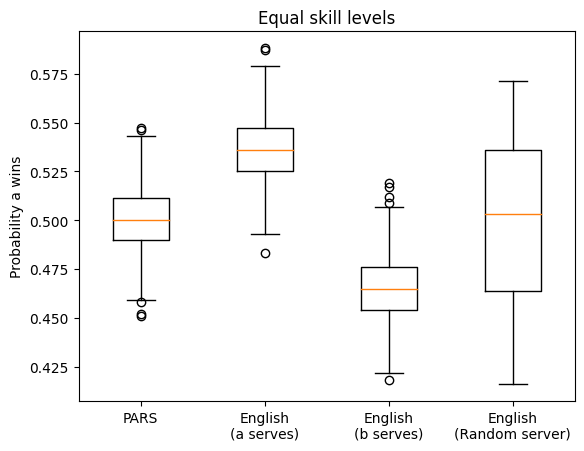

In [132]:
plot_single_win_probability(50, 50, 1000)

From this graph we can determine a few things. Firstly, PARS produces an almost equal distribution around 0.5 (50%). Suggesting that each player has an equal chance of winning the game.
In the second and third plot, we can see that the initial server effects the probability of A winning. Therefore, we can deduce that the initial server has a slightly higher chance of winning a game. The fourth plot has a much larger spread showing how much a game can vary purely on who plays first.

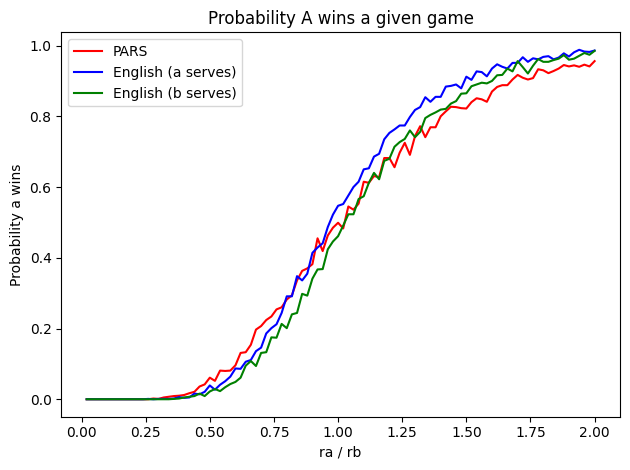

In [138]:
d = create_data_set()
p = plot_win_probabilities_both(d, 1000)

This graph further supports the theory as a clearly has a higher chance of winning than b for the majority of ra/rb when serving. However, it also shows that for low values of ra/rb being the initial server has a lower chance of winning than in PARS. This is most likely due to the fact that once the opponent becomes the server, their skill level outweighs the impact of initially serving and they have a higher chance of continuing than the opponent winning twice in a row. This is even more noticeable when b serves as it takes a higher level of ra/rb for the probability to exceed the pars game.

## Conclusions

In conclusion, I believe that PARS is the better squash scoring system. This is because in English scoring, the initial server has an increase in their chances of winning at an equal or higher skill level. And at a lower skill level their chances of winning are reduced regardless, but more noticeably when they are not the server. In my opinion a player should not have an advantage based on initial starting conditions and should only have an advantage based on their own skill. Even if the server is determined randomly, it is still possible that one player ends up starting first multiple times just due to random chance. In the future I would also like to test factors such as game length to improve my decision as the difference in win rate is not as much as expected. Additionally testing equal skill levels causes very long game times, and thus takes much longer to calculate, I would use different skill levels in future projects. My system was also limited by the range of ra/rb values. Thus, I would also increase the amount of values.